<a href="https://colab.research.google.com/github/hijyun/music-recommedation-system-based-on-text/blob/main/data%26preprocessing/trainX_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 읽기

In [ ]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
import re
import numpy as np

In [ ]:
df_original = pd.read_csv('data/modern_romeo_and_juliet.csv',encoding='cp949')

In [ ]:
df_original.head()

,actscene,contents
0,"Act 1, Scene 1",It was hot. Sizzling. Even at eight o’clock.\n...
1,"Act 1, Scene 2","‘No,’ Capulet told his visitor. ‘It’s six of o..."
2,"Act 1, Scene 3",Lady Capulet came into the sitting room where ...
3,"Act 1, Scene 4",‘Are we going to make some excuse for coming w...
4,"Act 2, Scene 1",Romeo couldn’t bear to leave the house where h...


In [ ]:
df_original.tail()

,actscene,contents
17,"Act 4, Scene 3",Juliet didn’t argue with the Nurse’s choice of...
18,"Act 4, Scene 5",‘Mistress. Wake up… Juliet?’. The Nurse stood ...
19,"Act 5, Scene 1",Romeo had been in a good mood all morning. He’...
20,"Act 5, Scene 2",Friar Lawrence was humming. It was all working...
21,"Act 5, Scene 3","Paris approached the churchyard, his page walk..."


In [ ]:
df_original['act'] = np.arange(22)
df_original['scene'] = np.arange(22)
for i in range(len(df_original)):
    df_original.iloc[i,2] = df_original.iloc[i,0][:5]
    df_original.iloc[i,3] = df_original.iloc[i,0][7:]

In [ ]:
df = df_original.drop(['actscene'],axis=1)

In [ ]:
df_original.iloc[0,1][:1000]

'It was hot. Sizzling. Even at eight o’clock.\n\nVerona was coming to life: people poured out of the houses and filled the streets while market traders set up their stalls in the grand piazza. It was a good patch, an excellent place to catch the business of those who lived and worked in the rich houses that lined Verona’s main square.\n\nThe Capulet mansion was one of the biggest ? filled with servants and humming with activity. It was an hour till breakfast and while the cooks sweated over the fires in the kitchen, conjuring mouthwatering aromas of baked breads and hams, the servingmen killed time as best they could.\n\nTwo of them ? hot, bored and restless ? stepped out into the bustle of the piazza and swaggered about among the bright colours, the animal smells and the din of traders’ voices, hoping to find some action.\n\n‘I can tell you, Gregory,’ said Sampson, ‘I’m ready for them. Just watch me. Let a Montague so much as put a foot in the piazza and you’ll see how quick I am.’\n\

In [ ]:
df.head()

,contents,act,scene
0,It was hot. Sizzling. Even at eight o’clock.\n...,Act 1,Scene 1
1,"‘No,’ Capulet told his visitor. ‘It’s six of o...",Act 1,Scene 2
2,Lady Capulet came into the sitting room where ...,Act 1,Scene 3
3,‘Are we going to make some excuse for coming w...,Act 1,Scene 4
4,Romeo couldn’t bear to leave the house where h...,Act 2,Scene 1


In [ ]:
df.to_excel('act_scene_split_romeo&juliet.xlsx')

In [ ]:
df.shape

(22, 3)

In [ ]:
df.iloc[0,0][:1000]

'It was hot. Sizzling. Even at eight o’clock.\n\nVerona was coming to life: people poured out of the houses and filled the streets while market traders set up their stalls in the grand piazza. It was a good patch, an excellent place to catch the business of those who lived and worked in the rich houses that lined Verona’s main square.\n\nThe Capulet mansion was one of the biggest ? filled with servants and humming with activity. It was an hour till breakfast and while the cooks sweated over the fires in the kitchen, conjuring mouthwatering aromas of baked breads and hams, the servingmen killed time as best they could.\n\nTwo of them ? hot, bored and restless ? stepped out into the bustle of the piazza and swaggered about among the bright colours, the animal smells and the din of traders’ voices, hoping to find some action.\n\n‘I can tell you, Gregory,’ said Sampson, ‘I’m ready for them. Just watch me. Let a Montague so much as put a foot in the piazza and you’ll see how quick I am.’\n\

# 전처리

In [ ]:
def cleansing(text):
    pattern = '[0-9]' # 숫자제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '\n' 
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]' # 특수기호제거
    #pattern = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   

In [ ]:
for i in range(len(df)):
    df.iloc[i,0] = cleansing(df.iloc[i,0]) # 모든 열에 대해 cleansing함수 적용
    df.iloc[i,0] = df.iloc[i,0].lower()   # 소문자로 바꾸기

In [ ]:
df.iloc[0,0][:1000] # 전처리 후 데이터 확인

'it was hot sizzling even at eight oclock  verona was coming to life people poured out of the houses and filled the streets while market traders set up their stalls in the grand piazza it was a good patch an excellent place to catch the business of those who lived and worked in the rich houses that lined veronas main square  the capulet mansion was one of the biggest  filled with servants and humming with activity it was an hour till breakfast and while the cooks sweated over the fires in the kitchen conjuring mouthwatering aromas of baked breads and hams the servingmen killed time as best they could  two of them  hot bored and restless  stepped out into the bustle of the piazza and swaggered about among the bright colours the animal smells and the din of traders voices hoping to find some action  i can tell you gregory said sampson im ready for them just watch me let a montague so much as put a foot in the piazza and youll see how quick i am  sure gregory knew that his friends boasts 

# 데이터 100개로 분할

In [ ]:
df[['act','scene']].value_counts()

act    scene  
Act 5  Scene 3    1
       Scene 2    1
Act 1  Scene 2    1
       Scene 3    1
       Scene 4    1
Act 2  Scene 1    1
       Scene 2    1
       Scene 3    1
       Scene 4    1
       Scene 5    1
       Scene 6    1
Act 3  Scene 1    1
       Scene 2    1
       Scene 3    1
       Scene 4    1
       Scene 5    1
Act 4  Scene 1    1
       Scene 2    1
       Scene 3    1
       Scene 5    1
Act 5  Scene 1    1
Act 1  Scene 1    1
dtype: int64

## 글자수 세기

In [ ]:
df

,contents,act,scene
0,it was hot sizzling even at eight oclock vero...,Act 1,Scene 1
1,no capulet told his visitor its six of one and...,Act 1,Scene 2
2,lady capulet came into the sitting room where ...,Act 1,Scene 3
3,are we going to make some excuse for coming wi...,Act 1,Scene 4
4,romeo couldnt bear to leave the house where he...,Act 2,Scene 1
5,romeo sat up the moon was huge it cast a silve...,Act 2,Scene 2
6,friar lawrence was up early the clouds in the ...,Act 2,Scene 3
7,where the devil could romeo be mercutio and b...,Act 2,Scene 4
8,juliet could see by the way the sun hung over ...,Act 2,Scene 5
9,it was cool in the chapel romeo watched heat w...,Act 2,Scene 6


In [ ]:
count = []
num = 0
for i in range(len(df)):
    num += len(df.iloc[i,0])
    count.append(len(df.iloc[i,0]))
    print(df.iloc[i,1],',',df.iloc[i,2],':',len(df.iloc[i,0]))
print('전체 글자수 : ' , num)
print(count)
print('100으로 나눈 글자수:' , num/100)

Act 1 , Scene 1 : 14915
Act 1 , Scene 2 : 4896
Act 1 , Scene 3 : 4272
Act 1 , Scene 4 : 2374
Act 2 , Scene 1 : 2442
Act 2 , Scene 2 : 8282
Act 2 , Scene 3 : 3553
Act 2 , Scene 4 : 7174
Act 2 , Scene 5 : 4519
Act 2 , Scene 6 : 1714
Act 3 , Scene 1 : 16199
Act 3 , Scene 2 : 5423
Act 3 , Scene 3 : 7399
Act 3 , Scene 4 : 1855
Act 3 , Scene 5 : 10894
Act 4 , Scene 1 : 5903
Act 4 , Scene 2 : 2097
Act 4 , Scene 3 : 3154
Act 4 , Scene 5 : 4963
Act 5 , Scene 1 : 3762
Act 5 , Scene 2 : 1595
Act 5 , Scene 3 : 13695
전체 글자수 :  131080
[14915, 4896, 4272, 2374, 2442, 8282, 3553, 7174, 4519, 1714, 16199, 5423, 7399, 1855, 10894, 5903, 2097, 3154, 4963, 3762, 1595, 13695]
100으로 나눈 글자수: 1310.8


### 글자수 시각화

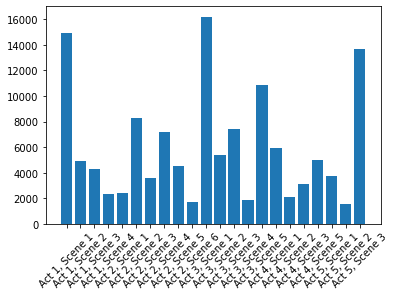

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(22)
actscene = df_original['actscene']
values = [100, 400, 900]

plt.bar(x, count)
plt.xticks(x, actscene, rotation=45)
plt.show()

## 텍스트 102개로 분할
* 글자가 1000~1200개 정도 되도록 분할. 나눈후 남는 글자는 마지막 텍스트에 들어가도록 조정

In [ ]:
text = []
num_list=[]
k = 0
for i in range(len(df)):
    divide = round(len(df.iloc[i,0])/1200)
    seq=df.iloc[i,0]
    length=round(len(df.iloc[i,0])/divide)
    t = [''.join(x) for x in zip(*[list(seq[z::length]) for z in range(length)])]
    t[-1] = t[-1]+df.iloc[i,0].split(t[-1])[-1]
    text.append(t)
    num_list.append(len(text[i]))
    k += len(text[i])
print('총 데이터 수 :' ,k)


총 데이터 수 : 102


In [ ]:
df1 = pd.DataFrame(index=range(0,102), columns=['text', 'act','scene'])
text_list = [r for t in text for r in t]
df1['text'] = text_list

act_list = []
scene_list = []
for i in range(len(num_list)):
    for r in range(num_list[i]):
        act_list.append(df.iloc[i,1])
        scene_list.append(df.iloc[i,2])

df1['act'] = act_list
df1['scene'] = scene_list

df1['actscene'] = np.arange(len(df1))
for i in range(len(df1)):
    df1.iloc[i,3] = df1.iloc[i,1]+df1.iloc[i,2]

In [ ]:
df1.head()

,text,act,scene,actscene
0,it was hot sizzling even at eight oclock vero...,Act 1,Scene 1,Act 1Scene 1
1,winking i know thats your level said gregory ...,Act 1,Scene 1,Act 1Scene 1
2,ague servants stopped one of them a rather sup...,Act 1,Scene 1,Act 1Scene 1
3,pson seeing that the montague men were about t...,Act 1,Scene 1,Act 1Scene 1
4,theres something i have to tell you he said my...,Act 1,Scene 1,Act 1Scene 1


In [ ]:
df1.tail()

,text,act,scene,actscene
97,ar friar she said where is my husband i rememb...,Act 5,Scene 3,Act 5Scene 3
98,here said juliet i must hurry oh thank god hes...,Act 5,Scene 3,Act 5Scene 3
99,ocking gently and moaning montague arrived at...,Act 5,Scene 3,Act 5Scene 3
100,the prince wasnt inclined to judge him there ...,Act 5,Scene 3,Act 5Scene 3
101,lost some of my own family everyones been puni...,Act 5,Scene 3,Act 5Scene 3


In [ ]:
#df1.to_excel('data/train.xlsx',index=False)

## 완성된 train_data 글자수 히스토그램

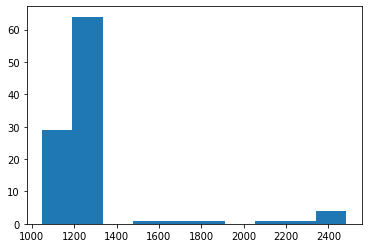

In [ ]:

count_list = [len(r) for r in df1['text']]
x = np.arange(len(df1))
actscene = df1['actscene']

#plt.bar(x, count_list)
#plt.xticks(x, actscene, rotation=45)
plt.hist(count_list)
plt.show()